In [2]:
import pandas as pd


In [3]:
df_fname = 'val_evals.csv.gz'
loss_prefix = {
    'rank': 'rnk',
    'balanced_focal_bce': 'bfbce',
    'balanced_focal_softmax_bce': 'bfsmbce'
}
model_suffix = {
    'GRU': 'dx_gru',
    'RETAIN': 'dx_retain'
}
hyperparam_folders = ['loss_comparison_E150B128', 'loss_comparison_E150B32']



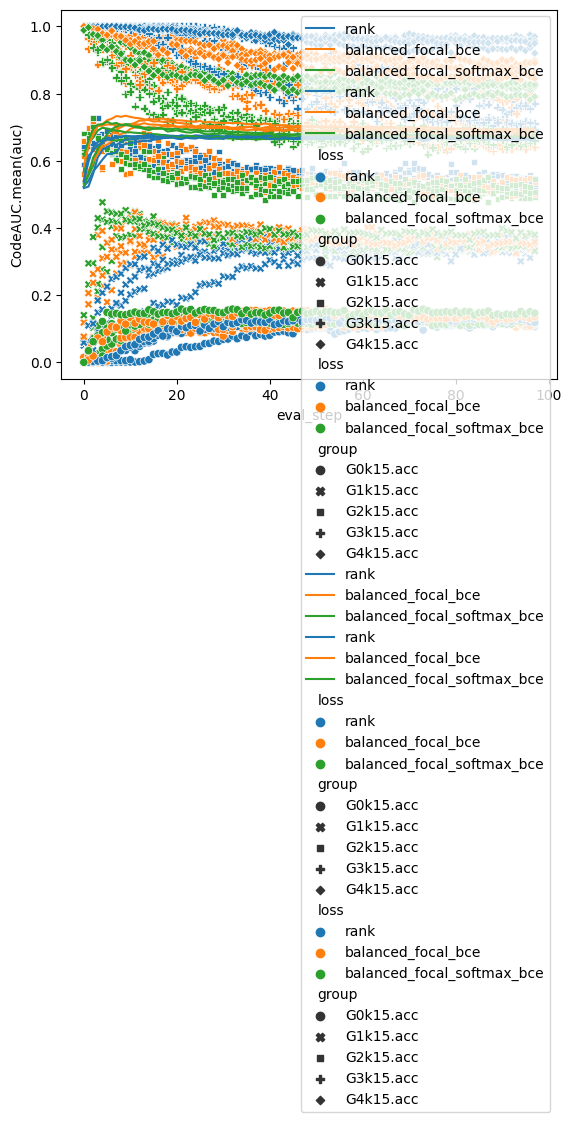

In [8]:
import seaborn as sns

for hp_folder in hyperparam_folders:
    model_evals = {}
    for modelname, suffix in model_suffix.items():
        model_evals[modelname] = {}
        for lossname, prefix in loss_prefix.items():
            evalfile = f'{hp_folder}/{prefix}_{suffix}/{df_fname}'
            model_evals[modelname][lossname] = pd.read_csv(evalfile, index_col=0)
    
    columns = list(list(model_evals.values())[0].values())[0].columns


    metric = 'CodeAUC.mean(auc)'
    # metric = 'AdmissionAUC.mean(auc)'

    
    for modelname, modelevals in model_evals.items():
        vals = []
        loss = []
        eval_step = []

        for loss_k, df in modelevals.items():
            eval_step.extend(range(len(df)))
            vals.extend(df[metric].values)
            loss.extend([loss_k] * len(df))

        df = pd.DataFrame({metric: vals, 'loss': loss, 'eval_step': eval_step})

        sns.lineplot(data=df, 
                     x='eval_step', 
                     y=metric, hue='loss')
        
    top15cols = [c for c in columns if 'k15' in c]
    for modelname, modelevals in model_evals.items():
        vals = []
        loss = []
        eval_step = []
        group_ = []

        for group in top15cols:
            for loss_k, df in modelevals.items():
                eval_step.extend(range(len(df)))
                vals.extend(df[group].values)
                loss.extend([loss_k] * len(df))
                group_.extend([group] * len(df))

        df = pd.DataFrame({metric: vals, 'loss': loss, 'eval_step': eval_step, 'group': group_})
        sns.scatterplot(data=df, x='eval_step', 
                        y=metric, hue='loss', 
                        style='group')
        